# Setup

In [1]:
# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
#coastal mask bounds 
cm_bounds = [48.5, 102.5,-1.5, 33]
figpath = '../figures/'

# Get Data

In [3]:
ds_CHL = xr.open_dataset('../data/chl_processed.nc')
ds_CHL

<xarray.Dataset>
Dimensions:           (lat: 828, lon: 1296, month: 12, time: 273)
Coordinates:
  * lon               (lon) float64 48.52 48.56 48.6 48.65 ... 102.4 102.4 102.5
  * lat               (lat) float64 -1.479 -1.438 -1.396 ... 32.9 32.94 32.98
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl           (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...
    mon_chl_mon_anom  (time, lat, lon) float64 ...

In [4]:
ds_CHL_SLA = xr.open_dataset('../data/chl_to_sla.nc')
ds_CHL_SLA

<xarray.Dataset>
Dimensions:           (lat: 138, lon: 216, month: 12, time: 273)
Coordinates:
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl_mon_anom  (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...

In [5]:
ds_SLA = xr.open_dataset('../data/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:             (day_time: 10013, lat: 138, loc_list: 6, lon: 216, month: 12, no_stations: 505, time: 329)
Coordinates:
  * lon                 (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat                 (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time                (time) datetime64[ns] 1993-01-01 ... 2020-05-01
  * day_time            (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month               (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations         (no_stations) float64 1.0 2.0 3.0 ... 503.0 504.0 505.0
  * loc_list            (loc_list) int64 0 75 225 294 415 504
Data variables:
    daily_sla           (day_time, lat, lon) float64 ...
    mon_sla             (time, lat, lon) float64 ...
    mon_sla_mon_clim    (month, lat, lon) float64 ...
    mon_sla_mon_anom    (time, lat, lon) float64 ...
    daily_sla_mon_anom  (day_time, lat, lon) float64 ...
    sta_loninds         (no_stations) int64 ...
   

In [6]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 744, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-06-01 1958-07-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

In [7]:
xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()
yy = yy.flatten()
# mask = mask_coast(xx,yy,np.array(cm_bounds))
# mask = np.reshape(mask,xx.shape)
# xx = xx[mask]
# yy = yy[mask]

In [8]:
std_anom = np.array(ds_CHL.mon_chl_mon_anom.std(dim = 'time'))

std_clim = np.array(ds_CHL.mon_chl_mon_clim.std(dim = 'month'))

# Subset and SLA DMI to CHL years 1997+ and by season

In [9]:
time_slice = slice('1997-09-01','2020-05-01')

dmi = ds_DMI['dmi'].sel(time = time_slice)

In [10]:
season = np.ones(dmi.time.shape)
for tt in range(dmi.time.shape[0]):
    mm = dmi.time.dt.month[tt]
    if (mm == 12) | (mm == 1) | (mm == 2) | (mm == 3) | (mm == 4) | (mm == 5):
        season[tt] = 0        

# CHL vs DMI

In [11]:
n = len(ds_CHL.mon_chl_mon_anom.lat)
m = len(ds_CHL.mon_chl_mon_anom.lon)
    
SLOPE_dmi = np.full([n,m,2],np.nan)
INTERCEPT_dmi = np.full([n,m,2],np.nan)
R_VALUE_dmi = np.full([n,m,2],np.nan)
P_VALUE_dmi = np.full([n,m,2],np.nan)
STD_ERR_dmi = np.full([n,m,2],np.nan)

for ss in range(2):
    with tqdm(total=n * m) as pbar:
        for ii,jj in itertools.product(np.arange(n),np.arange(m)):
            tempvar1 = np.array(ds_CHL.mon_chl_mon_anom[:,ii,jj])
            tempvar2 = np.array(dmi)
            
            #subset for season
            ind = (season == ss)
            tempvar1 = tempvar1[ind]
            tempvar2 = tempvar2[ind]
            
            nanmask = ~np.isnan(tempvar1)

            if tempvar1[nanmask].size != 0:
                slope, intercept, r_value, p_value, std_err=stats.linregress(tempvar1[nanmask],tempvar2[nanmask])

                SLOPE_dmi[ii,jj,ss] = slope
                INTERCEPT_dmi[ii,jj,ss] = intercept
                R_VALUE_dmi[ii,jj,ss] = r_value
                P_VALUE_dmi[ii,jj,ss] = p_value
                STD_ERR_dmi[ii,jj,ss] = std_err

            pbar.update(1)

  0%|          | 1194/1073088 [00:01<16:46, 1064.98it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
  2%|▏         | 16714/1073088 [00:15<16:23, 1073.76it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 1073088/1073088 [14:46<00:00, 1211.12it/s]


# CHL vs SLA interannual

In [12]:
time_slice = slice('1997-09-01','2020-05-01')
ds_SLA = ds_SLA.sel(time = time_slice)

season = np.ones(ds_SLA.time.shape)
for tt in range(ds_SLA.time.shape[0]):
    mm = ds_SLA.time.dt.month[tt]
    if (mm == 12) | (mm == 1) | (mm == 2) | (mm == 3) | (mm == 4) | (mm == 5):
        season[tt] = 0  

In [13]:
n = len(ds_CHL_SLA.mon_chl_mon_anom.lat)
m = len(ds_CHL_SLA.mon_chl_mon_anom.lon)
    
SLOPE_sla_ia = np.full([n,m,2],np.nan)
INTERCEPT_sla_ia = np.full([n,m,2],np.nan)
R_VALUE_sla_ia = np.full([n,m,2],np.nan)
P_VALUE_sla_ia = np.full([n,m,2],np.nan)
STD_ERR_sla_ia = np.full([n,m,2],np.nan)

for ss in range(2):
    with tqdm(total=n * m) as pbar:
        for ii,jj in itertools.product(np.arange(n),np.arange(m)):
            tempvar1 = np.array(ds_CHL_SLA.mon_chl_mon_anom[:,ii,jj])
            tempvar2 = np.array(ds_SLA.mon_sla_mon_anom[:,ii,jj])
            
            #subset for season
            ind = (season == ss)
            tempvar1 = tempvar1[ind]
            tempvar2 = tempvar2[ind]
            
            #subset for season
            

            nanmask = ~np.isnan(tempvar1)

            if tempvar1[nanmask].size != 0:
                slope, intercept, r_value, p_value, std_err=stats.linregress(tempvar1[nanmask],tempvar2[nanmask])

                SLOPE_sla_ia[ii,jj,ss] = slope
                INTERCEPT_sla_ia[ii,jj,ss] = intercept
                R_VALUE_sla_ia[ii,jj,ss] = r_value
                P_VALUE_sla_ia[ii,jj,ss] = p_value
                STD_ERR_sla_ia[ii,jj,ss] = std_err

            pbar.update(1)

 23%|██▎       | 6896/29808 [01:13<03:55, 97.14it/s] /home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 29808/29808 [05:20<00:00, 91.75it/s] 


# CHL vs SLA Seasonal

In [14]:
season = np.ones(ds_SLA.month.shape)
for tt in range(ds_SLA.month.shape[0]):
    mm = ds_SLA.month[tt]
    if (mm == 12) | (mm == 1) | (mm == 2) | (mm == 3) | (mm == 4) | (mm == 5):
        season[tt] = 0 

In [15]:
n = len(ds_CHL_SLA.mon_chl_mon_clim.lat)
m = len(ds_CHL_SLA.mon_chl_mon_clim.lon)
    
SLOPE_sla = np.full([n,m,2],np.nan)
INTERCEPT_sla = np.full([n,m,2],np.nan)
R_VALUE_sla = np.full([n,m,2],np.nan)
P_VALUE_sla = np.full([n,m,2],np.nan)
STD_ERR_sla = np.full([n,m,2],np.nan)

for ss in range(2):
    with tqdm(total=n * m) as pbar:
        for ii,jj in itertools.product(np.arange(n),np.arange(m)):
            tempvar1 = np.array(ds_CHL_SLA.mon_chl_mon_clim[:,ii,jj])
            tempvar2 = np.array(ds_SLA.mon_sla_mon_clim[:,ii,jj])
            
            #subset for season
            ind = (season == ss)
            tempvar1 = tempvar1[ind]
            tempvar2 = tempvar2[ind]
            
            #subset for season
            

            nanmask = ~np.isnan(tempvar1)

            if tempvar1[nanmask].size != 0:
                slope, intercept, r_value, p_value, std_err=stats.linregress(tempvar1[nanmask],tempvar2[nanmask])

                SLOPE_sla[ii,jj,ss] = slope
                INTERCEPT_sla[ii,jj,ss] = intercept
                R_VALUE_sla[ii,jj,ss] = r_value
                P_VALUE_sla[ii,jj,ss] = p_value
                STD_ERR_sla[ii,jj,ss] = std_err

            pbar.update(1)

 23%|██▎       | 6876/29808 [00:15<00:51, 444.71it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 29808/29808 [01:05<00:00, 455.93it/s]


In [16]:
ds_ro = xr.open_dataset('/tigress/GEOCLIM/LRGROUP/shared_data/pco2_flux_coastal_Roobaert/mask_ocean.nc')
maskw_ro = ds_ro.mask_coastal2
# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

lat_slice = slice(lat_bounds[0], lat_bounds[1])
lon_slice = slice(lon_bounds[0], lon_bounds[1])

#subset gridded data
maskw_ro = maskw_ro.sel(latitude = lat_slice, longitude = lon_slice)

lat_ro = np.array(maskw_ro.latitude)
lon_ro = np.array(maskw_ro.longitude)
maskw_ro = np.array(maskw_ro).astype(int).T
xx_ro,yy_ro = np.meshgrid(lon_ro,lat_ro)

# remove nicobar islands
maskw_ro = np.where(~((yy_ro>7) & (yy_ro<13.75) & (xx_ro>92) & (xx_ro<94)),maskw_ro,False)

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
inlat = yy.flatten()
inlon = xx.flatten()

mask= mask_coast(inlat,inlon,maskw_ro,lat_ro,lon_ro)

xx,yy = np.meshgrid(np.array(ds_CHL_SLA.lon),np.array(ds_CHL_SLA.lat))
inlat = yy.flatten()
inlon = xx.flatten()

mask_sla= mask_coast(inlat,inlon,maskw_ro,lat_ro,lon_ro)

# Plot

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

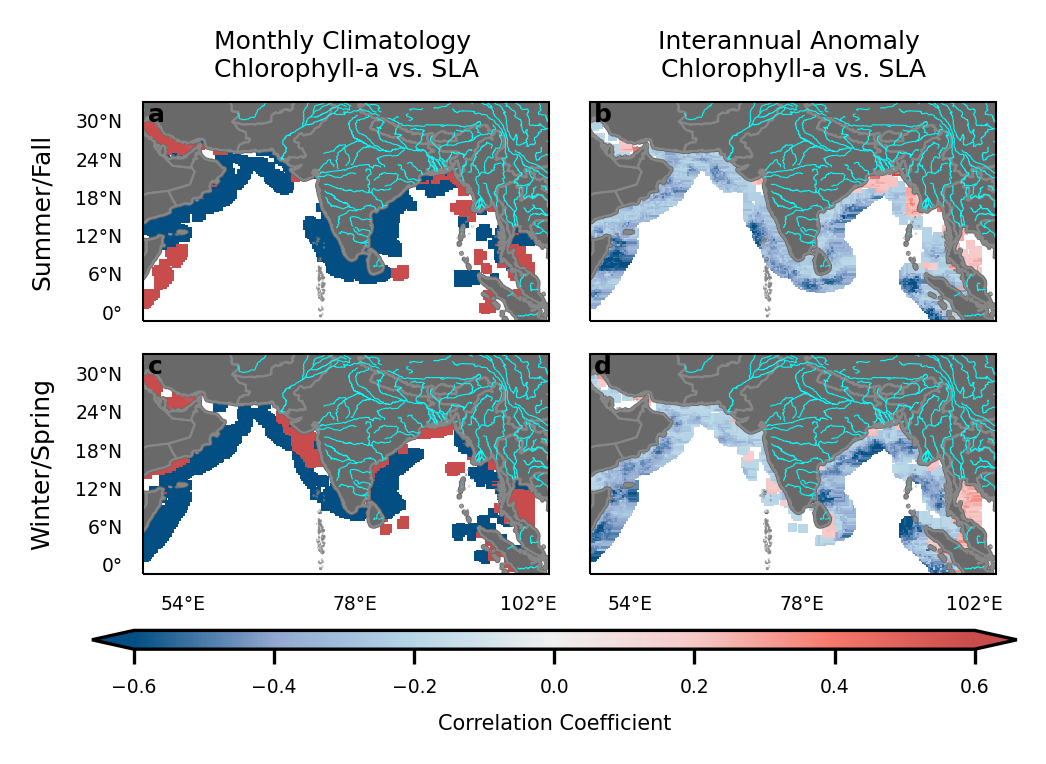

In [18]:
fig = plt.figure(figsize=(8.7/2.54,2.5),dpi=300)
sz = 5

cmin_corr = -0.6
cmax_corr = 0.6

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 4,
         'axes.labelsize': 6,
         'axes.titlesize': 6,
         'xtick.labelsize':4,
         'ytick.labelsize':4}
pylab.rcParams.update(params)

lfsz = 6

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]


xx_sla,yy_sla = np.meshgrid(np.array(ds_SLA.lon),np.array(ds_SLA.lat))
xx_sla = xx_sla.flatten()[mask_sla]
yy_sla = yy_sla.flatten()[mask_sla]
##############################################################


ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
ylabel_map(ax,x = -0.22,label='Summer/Fall', fontsize = 6)
ax.set_title('Monthly Climatology \nChlorophyll-a vs. SLA')
g = add_land(ax, countries = True, rivers = True)
g.xlabels_bottom = False
g.xlabel_style = {'size': 4.5}
g.ylabel_style = {'size': 4.5}
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfsz)

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 4.5}
g.ylabel_style = {'size': 4.5}
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfsz)
ax.set_title('Interannual Anomaly \nChlorophyll-a vs. SLA')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 4.5}
g.ylabel_style = {'size': 4.5}
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfsz)
ylabel_map(ax,x = -0.22,label='Winter/Spring', fontsize = 6)

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.ylabels_left = False
g.xlabel_style = {'size': 4.5}
g.ylabel_style = {'size': 4.5}
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfsz)

cbar_ax = fig.add_axes([0.1, 0.15, 0.9, 0.025])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                    extend = 'both')
cbar.set_label('Correlation Coefficient', fontsize = 5)
cbar.ax.tick_params(axis='x', colors='k',labelsize=4.5)

plt.subplots_adjust(wspace = 0.1, hspace = 0.15, bottom = 0.25, left = 0.15, right = 0.98)
plt.savefig(figpath + 'chl.pdf', format='pdf', dpi = 400)

In [ ]:
def ylabel_map(ax,label,x = -0.15, y = 0.5, fontsize = 18, color = 'k'):
    ax.text(x, y, label, va='bottom', ha='center',color = color,
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = fontsize)

In [ ]:
fig = plt.figure(figsize=(8.7/2.54,2.5),dpi=300)
sz = 5

cmin_corr = -0.6
cmax_corr = 0.6

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 4,
         'axes.labelsize': 6,
         'axes.titlesize': 6,
         'xtick.labelsize':4,
         'ytick.labelsize':4}
pylab.rcParams.update(params)

lfsz = 6

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]


xx_sla,yy_sla = np.meshgrid(np.array(ds_SLA.lon),np.array(ds_SLA.lat))
xx_sla = xx_sla.flatten()[mask_sla]
yy_sla = yy_sla.flatten()[mask_sla]
##############################################################


ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
ylabel_map(ax,x = -0.22,label='Summer/Fall', fontsize = 6, color = 'w')
ax.set_title('Monthly Climatology \nChlorophyll-a vs. SLA', color = 'w')
[ax.spines[x].set_color('w') for x in ["bottom","top","left","right"]]
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
g = add_land(ax, countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
g.xlabels_bottom = False
g.xlabel_style = {'size': 4.5, 'color': 'w'}
g.ylabel_style = {'size': 4.5, 'color': 'w'}
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfsz)

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
[ax.spines[x].set_color('w') for x in ["bottom","top","left","right"]]
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
g = add_land(ax, countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 4.5, 'color': 'w'}
g.ylabel_style = {'size': 4.5, 'color': 'w'}
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfsz)
ax.set_title('Interannual Anomaly \nChlorophyll-a vs. SLA', color = 'w')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
[ax.spines[x].set_color('w') for x in ["bottom","top","left","right"]]
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
g = add_land(ax, countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 4.5, 'color': 'w'}
g.ylabel_style = {'size': 4.5, 'color': 'w'}
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfsz)
ylabel_map(ax,x = -0.22,label='Winter/Spring', fontsize = 6, color = 'w')

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
[ax.spines[x].set_color('w') for x in ["bottom","top","left","right"]]
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
g = add_land(ax, countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
g.xlocator = mticker.FixedLocator([54,78,102])
g.ylabels_left = False
g.xlabel_style = {'size': 4.5, 'color': 'w'}
g.ylabel_style = {'size': 4.5, 'color': 'w'}
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfsz)

cbar_ax = fig.add_axes([0.05, 0.15, 0.9, 0.025])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                    extend = 'both')
cbar.set_label('Correlation Coefficient', fontsize = 5, color = 'w')
cbar.ax.tick_params(axis='x', colors='w',labelsize=4.5)

plt.subplots_adjust(wspace = 0.1, hspace = 0.15, bottom = 0.25, left = 0.08, right = 0.98)
# plt.savefig(figpath + 'chl.pdf', format='pdf', dpi = 400)

In [ ]:
fig = plt.figure(figsize=(17.8/2.54,3.5),dpi=300)
sz = 5

cmin_corr = -0.6
cmax_corr = 0.6

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 4,
         'axes.labelsize': 6,
         'axes.titlesize': 8,
         'xtick.labelsize':4,
         'ytick.labelsize':4}
pylab.rcParams.update(params)

lfsz = 6

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]


xx_sla,yy_sla = np.meshgrid(np.array(ds_SLA.lon),np.array(ds_SLA.lat))
xx_sla = xx_sla.flatten()[mask_sla]
yy_sla = yy_sla.flatten()[mask_sla]
##############################################################


ax = fig.add_subplot(231,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
ylabel_map(ax,x = -0.2,label='Summer/Fall', fontsize = 8)
ax.set_title('Mean Annual Cycle \nChlorophyll-a vs. SLA')
g = add_land(ax, countries = True, rivers = True)
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'a', x = 0.01,y=0.93, fontsize = lfsz)

ax = fig.add_subplot(232,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'b', x = 0.01,y=0.93, fontsize = lfsz)
ax.set_title('Interannual Anomaly \nChlorophyll-a vs. SLA')

ax = fig.add_subplot(233,projection= ccrs.PlateCarree())
tmp = R_VALUE_dmi[:,:,1].flatten()[mask]
hatch_var = P_VALUE_dmi[:,:,1].flatten()[mask]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlabels_bottom = False
g.ylabels_left = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'c', x = 0.01,y=0.93, fontsize = lfsz)
ax.set_title('Interannual Anomaly \nChlorophyll-a vs. DMI')

ax = fig.add_subplot(234,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'd', x = 0.01,y=0.93, fontsize = lfsz)
ylabel_map(ax,x = -0.2,label='Winter/Spring', fontsize = 8)

ax = fig.add_subplot(235,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.ylabels_left = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'e', x = 0.01,y=0.93, fontsize = lfsz)

ax = fig.add_subplot(236,projection= ccrs.PlateCarree())
tmp = R_VALUE_dmi[:,:,0].flatten()[mask]
hatch_var = P_VALUE_dmi[:,:,0].flatten()[mask]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.ylabels_left = False
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
add_letter(ax, 'f', x = 0.01,y=0.93, fontsize = lfsz)

cbar_ax = fig.add_axes([0.125, 0.15, 0.775, 0.025])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                    extend = 'both')
cbar.set_label('Correlation Coefficient', fontsize = 8)
cbar.ax.tick_params(axis='x', colors='k',labelsize=6)

plt.subplots_adjust(wspace = 0.1, hspace = 0.15, bottom = 0.25)
# plt.savefig(figpath + 'chl.pdf', format='pdf', dpi = 400)